In [1]:
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
#nltk.download('punkt')
from nltk.corpus import stopwords
#conda install -c conda-forge wordcloud
#pip install numpy matplotlib pillow wordcloud imageio jieba snownlp itchat -i https://pypi.tuna.tsinghua.edu.cn/simple

In [2]:
df = pd.read_csv("DataScientist.csv")
df = df.iloc[:,2:]

In [3]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

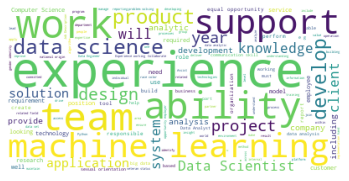

In [4]:
# Overall Wordcloud

text = ''.join(df['Job Description'])

wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white').generate(text)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

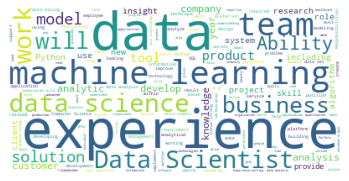

In [5]:
# Wordcloud for Data Scientist

text = ''.join(df[df['Job Title'] == 'Data Scientist']['Job Description'])

wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white').generate(text)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

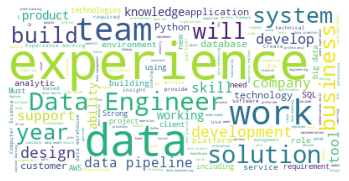

In [6]:
# Wordcloud for Data Engineer

text = ''.join(df[df['Job Title'] == 'Data Engineer']['Job Description'])

wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white').generate(text)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

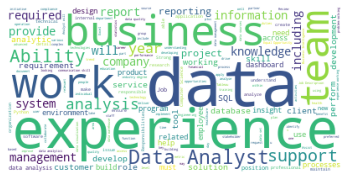

In [7]:
# Wordcloud for Data Analyst

text = ''.join(df[df['Job Title'] == 'Data Analyst']['Job Description'])

wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white').generate(text)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [8]:
def wordfreq(text, num):
    # Initiate text
    # Normalize words: convert all upper-case letter to lower case
    lower  = text.lower()
    # Tokenization: using nltk word_tokenize
    tokens = nltk.word_tokenize(lower)
    #nltk.download('stopwords')
    from nltk.corpus import stopwords
    nltk_stopwords = stopwords.words('english')
    # Remove stopwords using stopwords from nltk
    user_stopwords =[]
    stopwords = user_stopwords + nltk_stopwords
    tokens_f = [term for term in tokens if term not in stopwords and term.isalnum()]
    # Lemmatization
    nltk.download('wordnet')
    from nltk.stem import WordNetLemmatizer
    lem = WordNetLemmatizer()
    tokens_lem = [lem.lemmatize(word) for word in tokens_f]
    # Calculate frequency
    freq=nltk.FreqDist(tokens_lem)
    ##print("Top", num, "frequent word", freq.most_common(num))
    # Create table
    freqtable = pd.DataFrame({"Word": [item[0] for item in freq.most_common(num)],
                          "Frequency": [item[1] for item in freq.most_common(num)]},
                          index = np.arange(1,num+1))
    return freqtable

In [9]:
text = ''.join(df['Job Description'])
freqtable = wordfreq(text, 20)
freqtable

[nltk_data] Downloading package wordnet to /Users/JANEY/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Word,Frequency
1,data,35488
2,experience,21043
3,work,10496
4,team,10203
5,business,10082
6,skill,7275
7,year,7010
8,science,6185
9,development,5988
10,analysis,5986


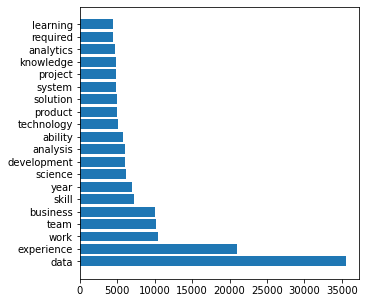

In [10]:
# Create graph
fig, ax = plt.subplots(figsize =(5, 5))
ax.barh(freqtable['Word'], freqtable['Frequency'])
plt.show()

In [11]:
def wordfreq(text, num):
    # Initiate text
    # Normalize words: convert all upper-case letter to lower case
    lower  = text.lower()
    # Tokenization: using nltk word_tokenize
    tokens = nltk.word_tokenize(lower)
    #nltk.download('stopwords')
    from nltk.corpus import stopwords
    nltk_stopwords = stopwords.words('english')
    # Remove stopwords using stopwords from nltk
    user_stopwords =["data", "experience", "including", "required", "job"]
    stopwords = user_stopwords + nltk_stopwords
    tokens_f = [term for term in tokens if term not in stopwords and term.isalnum()]
    # Lemmatization
    nltk.download('wordnet')
    from nltk.stem import WordNetLemmatizer
    lem = WordNetLemmatizer()
    tokens_lem = [lem.lemmatize(word) for word in tokens_f]
    # Calculate frequency
    freq=nltk.FreqDist(tokens_lem)
    ##print("Top", num, "frequent word", freq.most_common(num))
    
    # Create table
    freqtable = pd.DataFrame({"Word": [item[0] for item in freq.most_common(num)],
                          "Frequency": [item[1] for item in freq.most_common(num)]},
                          index = np.arange(1,num+1))
    return freqtable

In [12]:
# Overall
text = ''.join(df['Job Description'])
freqtable = wordfreq(text, 20)
freqtable

[nltk_data] Downloading package wordnet to /Users/JANEY/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Word,Frequency
1,work,10496
2,team,10203
3,business,10082
4,skill,7275
5,year,7010
6,science,6185
7,development,5988
8,analysis,5986
9,ability,5707
10,technology,5157


In [13]:
# Data Scientist
text = ''.join(df[df['Job Title'] == 'Data Scientist']['Job Description'])
freqtable = wordfreq(text, 20)
freqtable

[nltk_data] Downloading package wordnet to /Users/JANEY/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Word,Frequency
1,business,666
2,science,666
3,team,639
4,work,597
5,learning,591
6,model,536
7,analysis,534
8,skill,486
9,machine,474
10,scientist,443


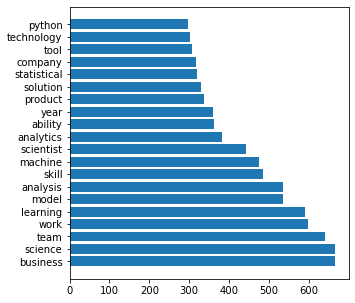

In [14]:
# Create graph
fig, ax = plt.subplots(figsize =(5, 5))
ax.barh(freqtable['Word'], freqtable['Frequency'])
plt.show()

In [15]:
# Data Engineer
text = ''.join(df[df['Job Title'] == 'Data Engineer']['Job Description'])
freqtable = wordfreq(text, 20)
freqtable

[nltk_data] Downloading package wordnet to /Users/JANEY/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Word,Frequency
1,team,587
2,work,569
3,business,500
4,engineer,480
5,year,479
6,technology,464
7,solution,383
8,system,378
9,skill,367
10,working,356


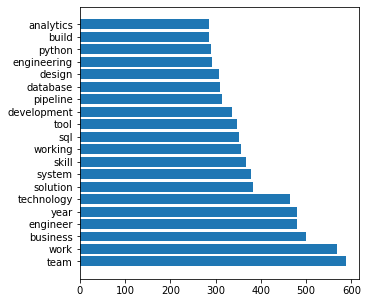

In [16]:
# Create graph
fig, ax = plt.subplots(figsize =(5, 5))
ax.barh(freqtable['Word'], freqtable['Frequency'])
plt.show()

In [17]:
# Data Analyst
text = ''.join(df[df['Job Title'] == 'Data Analyst']['Job Description'])
freqtable = wordfreq(text, 20)
freqtable

[nltk_data] Downloading package wordnet to /Users/JANEY/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Word,Frequency
1,business,640
2,work,586
3,skill,490
4,team,464
5,analysis,446
6,analyst,419
7,year,348
8,ability,348
9,management,331
10,strong,323


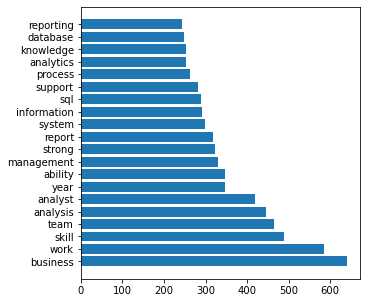

In [18]:
# Create graph
fig, ax = plt.subplots(figsize =(5, 5))
ax.barh(freqtable['Word'], freqtable['Frequency'])
plt.show()